<center> <h3>Ablation study on stabilizing GANs </h3></center>
<p> In this file, we will explore how different design options can affect the stability of training GANs. For this purpose, we will implement several GAN networks using various stabilization methods from literature, compare their performance on the MNIST dataset, and finally show the value of using dropout in the learning process.</p>
<p> First we will build a basic CNN using guidlines of <a href="https://arxiv.org/pdf/1511.06434.pdf%C3">Alec Radford et al.</a>, then will try to imporve the results by applying various tricks. To be precise, we will try the following design options:</p>

<ol>
    <li> A Baseline model using architecture guidelines of <a href="https://arxiv.org/pdf/1511.06434.pdf%C3">Alec Radford et al.</a> page 3.</li>
    <li> The baseline model with label smoothing</li>
    <li> The baseline model with noisy data</li>
    <li> The baseline model with TTUR</li>
    <li> The baseline model with <a href="https://arxiv.org/pdf/1802.05957.pdf">spectral normalization</a></li>
    <li> The baseline model with the four previous variants</li>
    <li> The last model with dropout layers</li>
</ol>

<p> Each model will be trained for 50 epochs. Within each iteration (mini batch), the generator will be trained 2 times while discrimiator will be trained only once with the aim of avoiding a potential saturation of loss function. We will use a batch of size 100, a latent of size 100, slope for leaky ReLU 0.2, discriminator LR 0.0001, and 64 filters for all conv layers. These fixed params were not optimized.</p>



#### import libraries

In [1]:
import os
import ipyplot

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader


from IPython.display import Image
from discriminators import SimpleDiscriminator, SN_Discriminator
from generators import SimpleGenerator, SN_Generator
from trainer import train_GAN
from config import GAN_Config
from utils import batch_denorm, plot_torch_image, init_weights, plot_scores, plot_losses

In [2]:
%matplotlib inline 
plt.style.use("ggplot")

In [3]:
if torch.cuda.is_available():
    x = !nvidia-smi
    for line in range(1, 12):
        print(x[line])

+-----------------------------------------------------------------------------+
| NVIDIA-SMI 461.92       Driver Version: 461.92       CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 306... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   32C    P8     9W /  N/A |    789MiB /  6144MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+


### Configurations

In [4]:
data_root = './data'
config = GAN_Config()

### Dataset
#### Define dataset and dataloader

In [5]:
dataset = MNIST(data_root, 
                train=True, 
                download=True,
                transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))
data_loader = DataLoader(dataset, batch_size=config.batch_size, shuffle=True, drop_last=True)

### Define loss functions

In [6]:
bce_loss = nn.BCELoss() # binary cross-entropy

### Experiment #1: Baseline GAN

In [7]:
config_dict = {'num_epochs':50, 'dlr':0.0001, 'glr':0.0001, 'dropout_rate_d':0.0, 'label_smooth':1.0, 
               'use_noise':False, 'samples_dir':'./samples/01-Baseline', 'models_dir':'./models/01-Baseline', 
               'exp_name':'Baseline',}
config1 = GAN_Config(**config_dict)

# Create new Generator model
G = SimpleGenerator(config1.image_c, config1.image_h, config1.image_w, config1.latent_size, config1.ngf)
G.apply(init_weights)

# Create new Discriminator model
D = SimpleDiscriminator(config1.image_c, config1.ndf, config1.leaky_slope, config1.dropout_rate_d)
D.apply(init_weights);

# Train model
d_losses1, g_losses1, real_scores1, fake_scores1 = train_GAN(G, D, data_loader, bce_loss, config1)

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

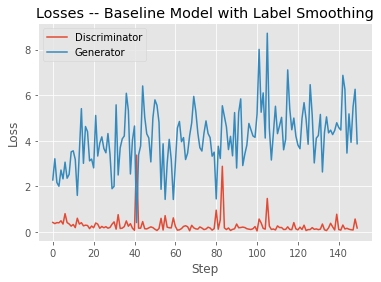

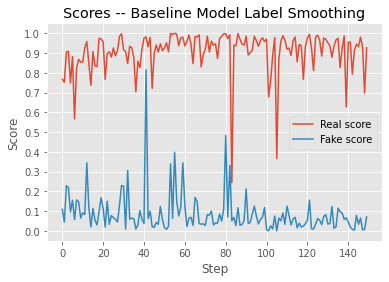

In [8]:
# Draw scores
plot_losses(d_losses1, g_losses1, plt_title="Baseline Model with Label Smoothing")
plot_scores(real_scores1, fake_scores1, plt_title="Baseline Model Label Smoothing")

### Experiment #2: Baseline GAN with label smoothing

In [9]:
config_dict = {'num_epochs':50, 'dlr':0.0001, 'glr':0.0001, 'dropout_rate_d':0.0, 'label_smooth':0.9, 
               'use_noise':False, 'samples_dir':'./samples/02-Baseline_LS', 'models_dir':'./models/02-Baseline_LS', 
               'exp_name':'Baseline_LS'}
config2 = GAN_Config(**config_dict)

# Create new Generator model
G = SimpleGenerator(config2.image_c, config2.image_h, config2.image_w, config2.latent_size, config2.ngf)
G.apply(init_weights)

# Create new Discriminator model
D = SimpleDiscriminator(config2.image_c, config2.ndf, config2.leaky_slope, config2.dropout_rate_d)
D.apply(init_weights);

# Train model
d_losses2, g_losses2, real_scores2, fake_scores2 = train_GAN(G, D, data_loader, bce_loss, config2)

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

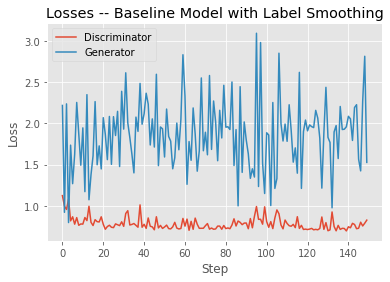

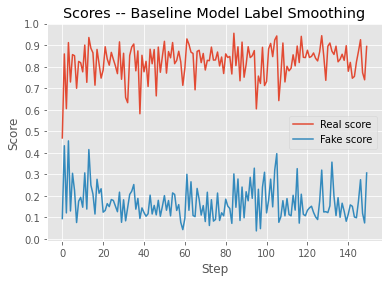

In [10]:
# Draw scores
plot_losses(d_losses2, g_losses2, plt_title="Baseline Model with Label Smoothing")
plot_scores(real_scores2, fake_scores2, plt_title="Baseline Model Label Smoothing")

### Experiment #3: Baseline GAN with noisy data

In [11]:
config_dict = {'num_epochs':50, 'dlr':0.0001, 'glr':0.0001, 'dropout_rate_d':0.0, 'label_smooth':1.0, 
               'use_noise':True, 'samples_dir':'./samples/03-Baseline_Noisy', 'models_dir':'./models/03-Baseline_Noisy', 
               'exp_name':'Baseline_Noisy'}
config3 = GAN_Config(**config_dict)

# Create new Generator model
G = SimpleGenerator(config3.image_c, config3.image_h, config3.image_w, config3.latent_size, config3.ngf)
G.apply(init_weights)

# Create new Discriminator model
D = SimpleDiscriminator(config3.image_c, config3.ndf, config3.leaky_slope, config3.dropout_rate_d)
D.apply(init_weights);

# Train model
d_losses3, g_losses3, real_scores3, fake_scores3 = train_GAN(G, D, data_loader, bce_loss, config3)

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

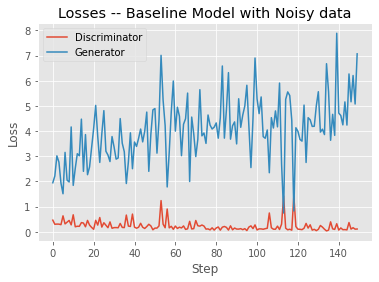

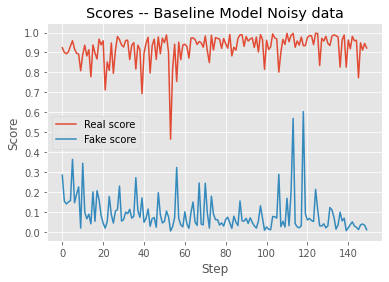

In [12]:
# Draw scores
plot_losses(d_losses3, g_losses3, plt_title="Baseline Model with Noisy data")
plot_scores(real_scores3, fake_scores3, plt_title="Baseline Model Noisy data")

### Experiment #4: Baseline GAN with TTUR

In [13]:
config_dict = {'num_epochs':50, 'dlr':0.0001, 'glr':0.0002, 'dropout_rate_d':0.0, 'label_smooth':1.0, 
               'use_noise':False, 'samples_dir':'./samples/04-Baseline_Noisy', 'models_dir':'./models/04-Baseline_TTUR', 
               'exp_name':'Baseline_TTUR'}
config4 = GAN_Config(**config_dict)

# Create new Generator model
G = SimpleGenerator(config4.image_c, config4.image_h, config4.image_w, config4.latent_size, config4.ngf)
G.apply(init_weights)

# Create new Discriminator model
D = SimpleDiscriminator(config4.image_c, config4.ndf, config4.leaky_slope, config4.dropout_rate_d)
D.apply(init_weights);

# Train model
d_losses4, g_losses4, real_scores4, fake_scores4 = train_GAN(G, D, data_loader, bce_loss, config4)

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

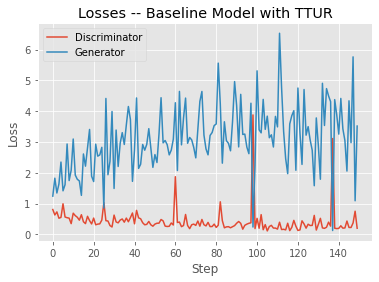

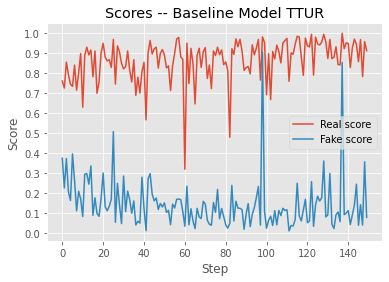

In [14]:
# Draw scores
plot_losses(d_losses4, g_losses4, plt_title="Baseline Model with TTUR")
plot_scores(real_scores4, fake_scores4, plt_title="Baseline Model TTUR")

### Experiment #5: Baseline GAN with SN

In [15]:
config_dict = {'num_epochs':50, 'dlr':0.0001, 'glr':0.0001, 'dropout_rate_d':0.0, 'label_smooth':1.0, 
               'use_noise':False, 'samples_dir':'./samples/05-Baseline_SN', 'models_dir':'./models/05-Baseline_SN', 
               'exp_name':'Baseline_SN'}
config5 = GAN_Config(**config_dict)

# Create new Generator model
G = SN_Generator(config5.image_c, config5.image_h, config5.image_w, config5.latent_size, config5.ngf)

# Create new Discriminator model
D = SN_Discriminator(config5.image_c, config5.ndf, config5.leaky_slope, config5.dropout_rate_d)

# Train model
d_losses5, g_losses5, real_scores5, fake_scores5 = train_GAN(G, D, data_loader, bce_loss, config5)

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

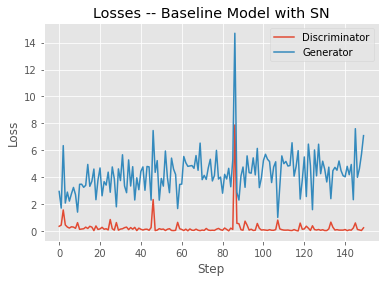

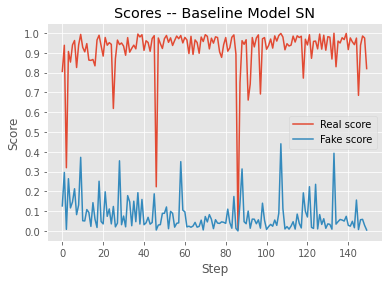

In [16]:
# Draw scores
plot_losses(d_losses5, g_losses5, plt_title="Baseline Model with SN")
plot_scores(real_scores5, fake_scores5, plt_title="Baseline Model SN")

### Experiment #6: Baseline GAN with label smothing, noise, TTUR, and SN

In [17]:
config_dict = {'num_epochs':50, 'dlr':0.0001, 'glr':0.0002, 'dropout_rate_d':0.0, 'label_smooth':0.9, 
               'use_noise':True,'samples_dir':'./samples/06-Baseline_Noisy_LS_noise_TTUR_SN', 
               'models_dir':'./models/06-Baseline_LS_noise_TTUR_SN', 'exp_name':'Baseline_LS_noise_TTUR_SN'}
config6 = GAN_Config(**config_dict)

# Create new Generator model
G = SN_Generator(config6.image_c, config6.image_h, config6.image_w, config6.latent_size, config6.ngf)

# Create new Discriminator model
D = SN_Discriminator(config6.image_c, config6.ndf, config6.leaky_slope, config6.dropout_rate_d)

# Train model
d_losses6, g_losses6, real_scores6, fake_scores6 = train_GAN(G, D, data_loader, bce_loss, config6)

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

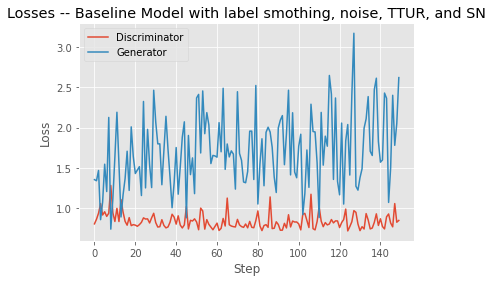

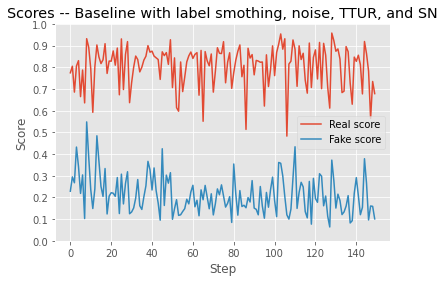

In [18]:
# Draw scores
plot_losses(d_losses6, g_losses6, plt_title="Baseline Model with label smothing, noise, TTUR, and SN")
plot_scores(real_scores6, fake_scores6, plt_title="Baseline with label smothing, noise, TTUR, and SN")

### Experiment #7: The magic of dropout

In [19]:
config_dict = {'num_epochs':50, 'dlr':0.0001, 'glr':0.0002, 'dropout_rate_d':0.5, 'label_smooth':0.9, 
               'use_noise':True, 'samples_dir':'./samples/07-Baseline_Dropout.5', 
               'models_dir':'./models/07-Baseline_Dropout.5', 'exp_name':'Baseline_Dropout.5'}
config7 = GAN_Config(**config_dict)

# Create new Generator model
G = SN_Generator(config7.image_c, config7.image_h, config7.image_w, config7.latent_size, config7.ngf)

# Create new Discriminator model
D = SN_Discriminator(config7.image_c, config7.ndf, config7.leaky_slope, config7.dropout_rate_d)

# Train model
d_losses7, g_losses7, real_scores7, fake_scores7 = train_GAN(G, D, data_loader, bce_loss, config7)

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

Running 600 mini batches: 0it [00:00, ?it/s]

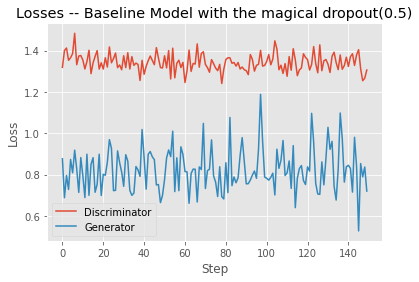

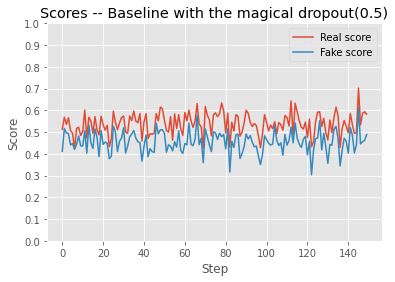

In [20]:
# Draw scores
plot_losses(d_losses7, g_losses7, plt_title="Baseline Model with the magical dropout(0.5)")
plot_scores(real_scores7, fake_scores7, plt_title="Baseline with the magical dropout(0.5)")

### Show generated images

In [21]:
print("Baseline model")
images_list=[os.path.join(config1.samples_dir, 'fake_images-0001.png'), 
             os.path.join(config1.samples_dir, 'fake_images-0025.png'), 
             os.path.join(config1.samples_dir, 'fake_images-0050.png')]
labels = [f'epoch#{i}' for i in ['01','25','50'] ]
ipyplot.plot_class_representations(images_list, labels, img_width=300);

Baseline model


In [22]:
print("Baseline model with label smoothing")
images_list=[os.path.join(config2.samples_dir, 'fake_images-0001.png'), 
             os.path.join(config2.samples_dir, 'fake_images-0025.png'), 
             os.path.join(config2.samples_dir, 'fake_images-0050.png')]
labels = [f'epoch#{i}' for i in ['01','25','50'] ]
ipyplot.plot_class_representations(images_list, labels, img_width=300);

Baseline model with label smoothing


In [23]:
print("Baseline model with noisy data")
images_list=[os.path.join(config3.samples_dir, 'fake_images-0001.png'), 
             os.path.join(config3.samples_dir, 'fake_images-0025.png'), 
             os.path.join(config3.samples_dir, 'fake_images-0050.png')]
labels = [f'epoch#{i}' for i in ['01','25','50'] ]
ipyplot.plot_class_representations(images_list, labels, img_width=300);

Baseline model with noisy data


In [24]:
print("Baseline model with TTUR")
images_list=[os.path.join(config4.samples_dir, 'fake_images-0001.png'), 
             os.path.join(config4.samples_dir, 'fake_images-0025.png'), 
             os.path.join(config4.samples_dir, 'fake_images-0050.png')]
labels = [f'epoch#{i}' for i in ['01','25','50'] ]
ipyplot.plot_class_representations(images_list, labels, img_width=300);

Baseline model with TTUR


In [25]:
print("Baseline model with spectral normalization")
images_list=[os.path.join(config5.samples_dir, 'fake_images-0001.png'), 
             os.path.join(config5.samples_dir, 'fake_images-0025.png'), 
             os.path.join(config5.samples_dir, 'fake_images-0050.png')]
labels = [f'epoch#{i}' for i in ['01','25','50'] ]
ipyplot.plot_class_representations(images_list, labels, img_width=300);

Baseline model with spectral normalization


In [26]:
print("Baseline model with the four previous variants")
images_list=[os.path.join(config6.samples_dir, 'fake_images-0001.png'), 
             os.path.join(config6.samples_dir, 'fake_images-0025.png'), 
             os.path.join(config6.samples_dir, 'fake_images-0050.png')]
labels = [f'epoch#{i}' for i in ['01','25','50'] ]
ipyplot.plot_class_representations(images_list, labels, img_width=300);

Baseline model with the four previous variants


In [27]:
print("Baseline mode with dropout")
images_list=[os.path.join(config7.samples_dir, 'fake_images-0001.png'), 
             os.path.join(config7.samples_dir, 'fake_images-0025.png'), 
             os.path.join(config7.samples_dir, 'fake_images-0050.png')]
labels = [f'epoch#{i}' for i in ['01','25','50'] ]
ipyplot.plot_class_representations(images_list, labels, img_width=300);

Baseline mode with dropout


Despite the fact that all models got good results, and the last model with dropout needed more epochs to start creating good images, but the most important thing is that dropout helped to stabilize the learning process, and this, in more complex tasks, can be very important, since it allows us to train for more epochs without having the problems of saturated losses or oscillatory losses.